# Buidling the model

## Importing Dataset 2

In [1]:
import os
import re
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_image_csvs(path="image_csv"):
    train_folder=os.path.join(os.getcwd(),path,"train")
    test_folder=os.path.join(os.getcwd(),path,"test")
    
    X_train, X_test, Y_train, Y_test = [],[],[],[]
    
    # loading images from train folder to X_train and label to y_train
    train_count = 0
    for image_fname in os.listdir(train_folder):
        image_re = re.match(r'([0-9]+)_([0-9]+)\.csv',image_fname)
        
        # process preprocessed image into normalised flattened numpy array
        image = np.loadtxt(os.path.join(train_folder,image_fname),delimiter=',',dtype=np.float32)
        label = image_re.group(2)
        
        X_train.append(image)
        Y_train.append(int(label))
        train_count+=1
        if train_count % 1000==0:
            print(train_count)
    print("Loaded train folder")
    
    # loading images from test folder to X_test and label to y_test
    test_count = 0
    for image_fname in os.listdir(test_folder):
        image_re = re.match(r'([0-9]+)_([0-9]+)\.csv',image_fname)
        
        # process preprocessed image into normalised flattened numpy array
        image = np.loadtxt(os.path.join(test_folder,image_fname),delimiter=',',dtype=np.float32)
        # assert image.shape == (240,240)
        # image = image.reshape(240*240)
        # image = image.astype('float32')
        # image /= 255
        # image = np.asarray(image).astype('float32')
        
        label = image_re.group(2)
        
        X_test.append(image)
        Y_test.append(int(label))
        test_count+=1
        if test_count % 1000==0:
            print(test_count)
    print("Loaded test folder")
    
    return np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)

In [3]:
X_train, X_test, Y_train, Y_test = load_image_csvs()

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Loaded train folder
1000
Loaded test folder


In [4]:
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [5]:
df = pd.DataFrame({'Images': list(X_train), 'Label' : list(Y_train)})
print(df.info)
df

<bound method DataFrame.info of                                                   Images  Label
0      [[3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0,...      3
1      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
2      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
3      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
4      [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
...                                                  ...    ...
10613  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      3
10614  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      2
10615  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...      1
10616  [[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0,...      3
10617  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0,...      0

[10618 rows x 2 columns]>


,Images,Label
0,"[[3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 4.0, 4.0,...",3
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3
...,...,...
10613,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3
10614,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2
10615,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",1
10616,"[[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0,...",3


In [6]:
df = pd.DataFrame({'Images': list(X_test), 'Label' : list(Y_test)})
print(df.info)
df

<bound method DataFrame.info of                                                  Images  Label
0     [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...      0
1     [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0,...      0
2     [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...      0
3     [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...      0
4     [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...      0
...                                                 ...    ...
1400  [[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...      0
1401  [[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...      0
1402  [[1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0,...      0
1403  [[2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...      0
1404  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...      0

[1405 rows x 2 columns]>


,Images,Label
0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
1,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0,...",0
2,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
3,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
...,...,...
1400,"[[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
1401,"[[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",0
1402,"[[1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0,...",0
1403,"[[2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0


In [7]:
# print(X_train)
print(np.shape(X_train))
# print(Y_train)
print(np.shape(Y_train))

# print(X_test)
print(np.shape(X_test))
# print(Y_test)
print(np.shape(Y_test))

(10618, 240, 240)
(10618,)
(1405, 240, 240)
(1405,)


## Duplicate channels

In [21]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
with tf.device('/CPU:0'):
    train_ds = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
    test_ds = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

In [9]:
class_names = ['gilioma', 'meningioma', 'notumor', 'pituitary']
# class_names = ['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']

### Visualizing dataset

In [10]:
import random

class RandomIterator:
    def __init__(self, data, limit=None):
        self.data = list(data)
        if limit is not None and limit < len(self.data):
            self.data = random.sample(self.data, limit)  # Randomly sample `limit` elements
        random.shuffle(self.data)
        self.index = 0
    
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.index >= len(self.data):
            raise StopIteration
        value = self.data[self.index]
        self.index += 1
        return value


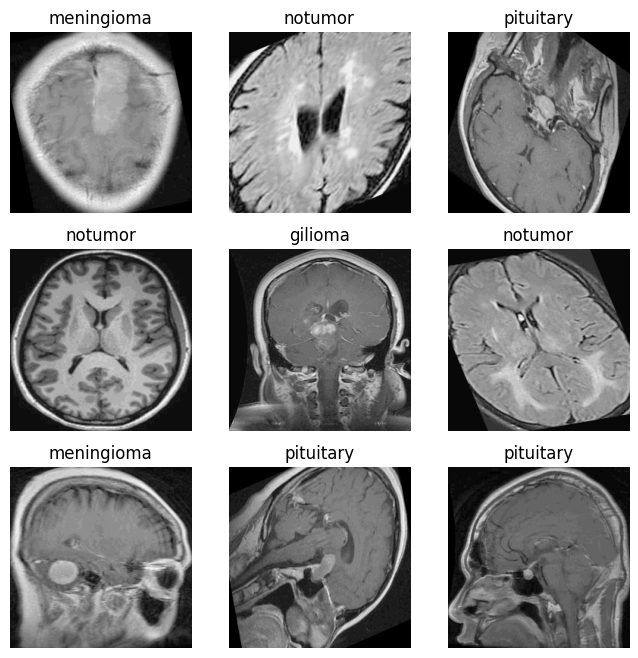

In [12]:
# Display the random 9 images in the dataset
# image_batch, label_batch = next(iter(train_ds))

x = RandomIterator(train_ds, limit=9)
plt.figure(figsize=(8, 8))
for i in range(9):
  image, label = next(x)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image.numpy(), cmap='gray')
  label = int(label)
  plt.title(class_names[label])
  plt.axis("off")

In [13]:
# Example usage of the transformed datasets
for image, label in train_ds.take(1):
    print(image)  # Should print (height, width, 3)
    print(image.shape)  # Should print (height, width, 3)
    print(label)  # Print the label of the image

for image, label in test_ds.take(1):
    print(image)  # Should print (height, width, 3)
    print(image.shape)  # Should print (height, width, 3)
    print(label)  # Print the label of the image

tf.Tensor(
[[ 3.  3.  3. ...  2.  3.  3.]
 [ 2.  3.  3. ...  3.  3.  3.]
 [ 3.  3.  3. ...  3.  3.  3.]
 ...
 [ 9.  9. 11. ... 12. 12. 12.]
 [ 9.  8.  8. ... 12. 12. 12.]
 [ 9.  9.  8. ... 12. 11. 10.]], shape=(240, 240), dtype=float32)
(240, 240)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [2. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]], shape=(240, 240), dtype=float32)
(240, 240)
tf.Tensor(0, shape=(), dtype=int32)


In [14]:

# Define a function to convert grayscale images to RGB
def grayscale_to_rgb(image, label):
    """
    Convert a grayscale image tensor to RGB by duplicating the channel and return image with label.
    
    Args:
    image (tf.Tensor): A tensor representing a grayscale image with shape (height, width, 1).
    label (tf.Tensor): A tensor representing the label.
    
    Returns:
    tf.Tensor: A tensor representing an RGB image with shape (height, width, 3).
    tf.Tensor: The label tensor.
    """
    print(image)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.grayscale_to_rgb(image)
    label = tf.cast(label, tf.float32)
    return image, label

In [15]:
# Normalization layer, also add extra channels to greyscale layer
# Apply the grayscale_to_rgb function to train_ds
train_ds_rgb = train_ds.map(lambda x, y: grayscale_to_rgb(tf.expand_dims(x, axis=-1), y))

# Apply the grayscale_to_rgb function to test_ds
test_ds_rgb = test_ds.map(lambda x, y: grayscale_to_rgb(tf.expand_dims(x, axis=-1), y))

# Example usage of the transformed datasets
for image, label in train_ds_rgb.take(1):
    print(image)  # Should print (height, width, 3)
    print(image.shape)  # Should print (height, width, 3)
    print(label)  # Print the label of the image

for image, label in test_ds_rgb.take(1):
    print(image)  # Should print (height, width, 3)
    print(image.shape)  # Should print (height, width, 3)
    print(label)  # Print the label of the image

Tensor("ExpandDims:0", shape=(240, 240, 1), dtype=float32)
Tensor("ExpandDims:0", shape=(240, 240, 1), dtype=float32)
tf.Tensor(
[[[0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  ...
  [0.00784314 0.00784314 0.00784314]
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]]

 [[0.00784314 0.00784314 0.00784314]
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  ...
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]]

 [[0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  ...
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]]

 ...

 [[0.03529412 0.03529412 0.03529412]
  [0.03529412 0.03529412 0.03529412]
  [0.04313726 0.04313726 0.04313726]
  ...
  [0.04705882 0.04705882 0.04705882]
  [0.04705882 0.04705

In [16]:
batch_size= 32

def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
  return ds

"""Also btw you can unbatch using .unbatch() method"""
train_ds_rgb_final = configure_for_performance(train_ds_rgb)
test_ds_rgb_final = configure_for_performance(test_ds_rgb)

In [17]:
# Example usage of the transformed datasets
for image_batch, label in train_ds_rgb_final.take(1):
    # print(image)  # Should print (height, width, 3)
    print(image_batch.shape)  # Should print (height, width, 3)
    print(label)  # Print the label of the image

for image, label in test_ds_rgb_final.take(1):
    # print(image)  # Should print (height, width, 3)
    print(image.shape)  # Should print (height, width, 3)
    print(label)  # Print the label of the image

(32, 240, 240, 3)
tf.Tensor(
[2. 2. 2. 0. 3. 2. 3. 2. 2. 2. 0. 3. 0. 1. 3. 0. 2. 0. 2. 0. 0. 2. 3. 0.
 2. 3. 2. 0. 0. 3. 3. 2.], shape=(32,), dtype=float32)
(32, 240, 240, 3)
tf.Tensor(
[3. 3. 0. 3. 0. 2. 3. 0. 2. 2. 2. 1. 1. 0. 3. 2. 0. 1. 3. 1. 1. 1. 2. 3.
 2. 2. 1. 3. 3. 1. 2. 2.], shape=(32,), dtype=float32)


##  Xception Model (Pretrained)

In [30]:
input_shape = (240, 240, 3)
num_classes = 4

In [18]:
from keras.applications import Xception
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Conv2D, Input

input_shape = (240, 240, 3)

# Load the Xception model pre-trained on ImageNet without the top layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer and a logistic layer with 10 classes
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
              run_eagerly = False)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 119, 119, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 119, 119, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [19]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [20]:
import tensorflow as tf
tf.config.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [21]:
# Train the model
history = model.fit(train_ds_rgb_final, epochs=10, validation_data=test_ds_rgb_final, callbacks = [tensorboard_callback])

Epoch 1/10


c:\Users\User\anaconda3\envs\py310\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


332/332 [==============================] - 61s 165ms/step - loss: 0.5802 - accuracy: 0.7672 - val_loss: 0.4354 - val_accuracy: 0.8434
Epoch 2/10
332/332 [==============================] - 53s 161ms/step - loss: 0.4039 - accuracy: 0.8446 - val_loss: 0.3945 - val_accuracy: 0.8591
Epoch 3/10
332/332 [==============================] - 53s 159ms/step - loss: 0.3311 - accuracy: 0.8735 - val_loss: 0.4206 - val_accuracy: 0.8577
Epoch 4/10
332/332 [==============================] - 53s 160ms/step - loss: 0.2792 - accuracy: 0.8924 - val_loss: 0.3456 - val_accuracy: 0.8769
Epoch 5/10
332/332 [==============================] - 53s 160ms/step - loss: 0.2421 - accuracy: 0.9083 - val_loss: 0.3091 - val_accuracy: 0.8840
Epoch 6/10
332/332 [==============================] - 53s 160ms/step - loss: 0.2116 - accuracy: 0.9199 - val_loss: 0.3083 - val_accuracy: 0.8897
Epoch 7/10
332/332 [==============================] - 53s 160ms/step - loss: 0.1743 - accuracy: 0.9348 - val_loss: 0.2924 - val_accuracy: 0.8

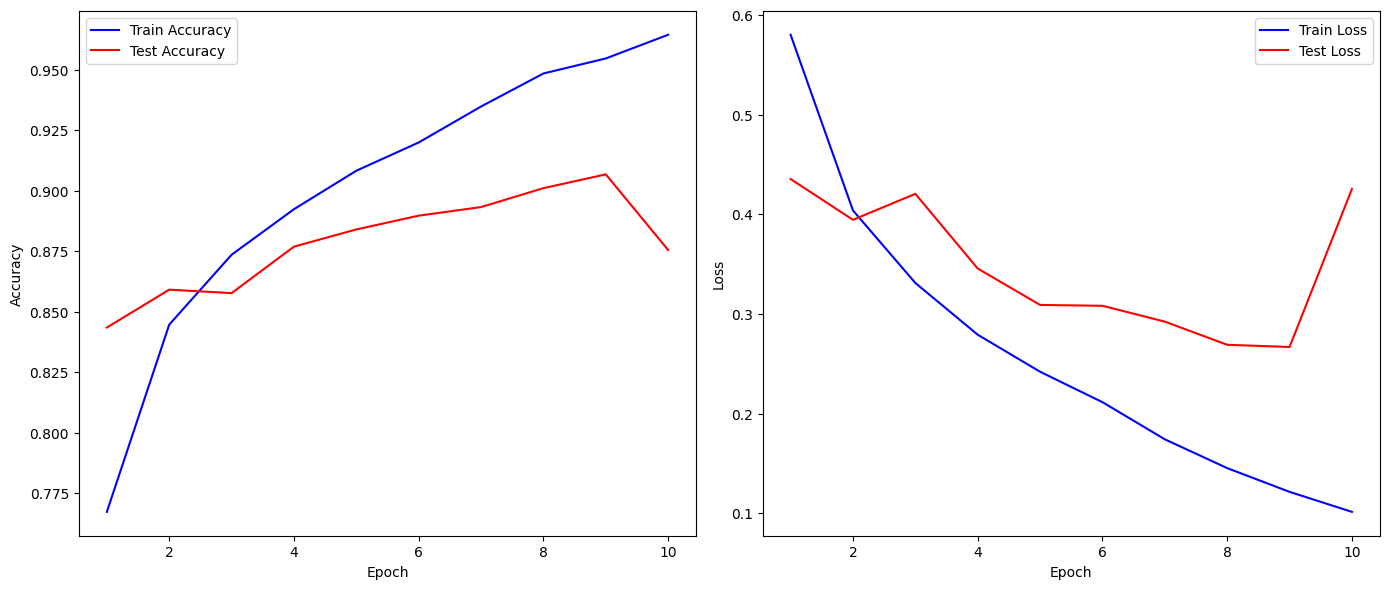

In [22]:
import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1,len(acc2)+1)
 
# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
 
axes[0].plot(epochs, acc2,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
 
axes[1].plot(epochs, loss2,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
 
# Adjusting layout for better spacing
plt.tight_layout()
 
# Display the figure
plt.show()

In [25]:
# Convert test_dataset to numpy arrays for prediction
X_test_list = []
y_test_list = []
for X_batch, y_batch in test_ds_rgb_final:
    X_test_list.append(X_batch.numpy())
    y_test_list.append(y_batch.numpy())

X_test_np = np.concatenate(X_test_list, axis=0)
y_test_np = np.concatenate(y_test_list, axis=0)

# Make predictions
predict_x = model.predict(X_test_np)
predict1 = np.argmax(predict_x, axis=1)

# Print predictions
print(predict1)

44/44 [==============================] - 6s 127ms/step
[3 2 1 ... 3 1 3]


In [26]:
from sklearn.metrics import classification_report 

# Print classification report
target_names = ["Class {}".format(i) for i in class_names]
print(classification_report(y_test_np, predict1, target_names=target_names))

                  precision    recall  f1-score   support

   Class gilioma       0.98      0.66      0.79       309
Class meningioma       0.70      0.97      0.81       335
   Class notumor       0.98      0.97      0.97       399
 Class pituitary       0.94      0.87      0.90       362

        accuracy                           0.88      1405
       macro avg       0.90      0.87      0.87      1405
    weighted avg       0.90      0.88      0.88      1405



# Hyperparametre Tuning

In [33]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
import keras_tuner as kt

def build_model(hp):
    # Load the Xception model with pretrained ImageNet weights, excluding the top layers
    base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers on top of the base model
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(hp.Int('units', min_value=512, max_value=2048, step=128), activation='relu')(x)
    x = Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1))(x)
    predictions = Dense(num_classes, activation='softmax')(x)  # Adjust num_classes to your dataset

    # Create the new model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(
                      hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    return model

In [35]:
# Set up the hyperparameter tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='tuning_dir',
    project_name='xception_tuning')

# Search for the best hyperparameters
tuner.search(train_ds_rgb_final, validation_data=test_ds_rgb_final, epochs=10)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 30 Complete [00h 08m 36s]
val_accuracy: 0.8761565685272217

Best val_accuracy So Far: 0.9110320210456848
Total elapsed time: 01h 48m 50s


In [36]:
# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_ds_rgb_final, validation_data=test_ds_rgb_final, epochs=10)

Epoch 1/10


c:\Users\User\anaconda3\envs\py310\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


332/332 [==============================] - 54s 153ms/step - loss: 0.6234 - accuracy: 0.7527 - val_loss: 0.6219 - val_accuracy: 0.7644
Epoch 2/10
332/332 [==============================] - 50s 152ms/step - loss: 0.4539 - accuracy: 0.8212 - val_loss: 0.3925 - val_accuracy: 0.8662
Epoch 3/10
332/332 [==============================] - 50s 152ms/step - loss: 0.3908 - accuracy: 0.8481 - val_loss: 0.3597 - val_accuracy: 0.8662
Epoch 4/10
332/332 [==============================] - 51s 152ms/step - loss: 0.3349 - accuracy: 0.8746 - val_loss: 0.3847 - val_accuracy: 0.8505
Epoch 5/10
332/332 [==============================] - 50s 152ms/step - loss: 0.3023 - accuracy: 0.8818 - val_loss: 0.2896 - val_accuracy: 0.8932
Epoch 6/10
332/332 [==============================] - 51s 153ms/step - loss: 0.2704 - accuracy: 0.8958 - val_loss: 0.3572 - val_accuracy: 0.8669
Epoch 7/10
332/332 [==============================] - 51s 153ms/step - loss: 0.2571 - accuracy: 0.9033 - val_loss: 0.2776 - val_accuracy: 0.8

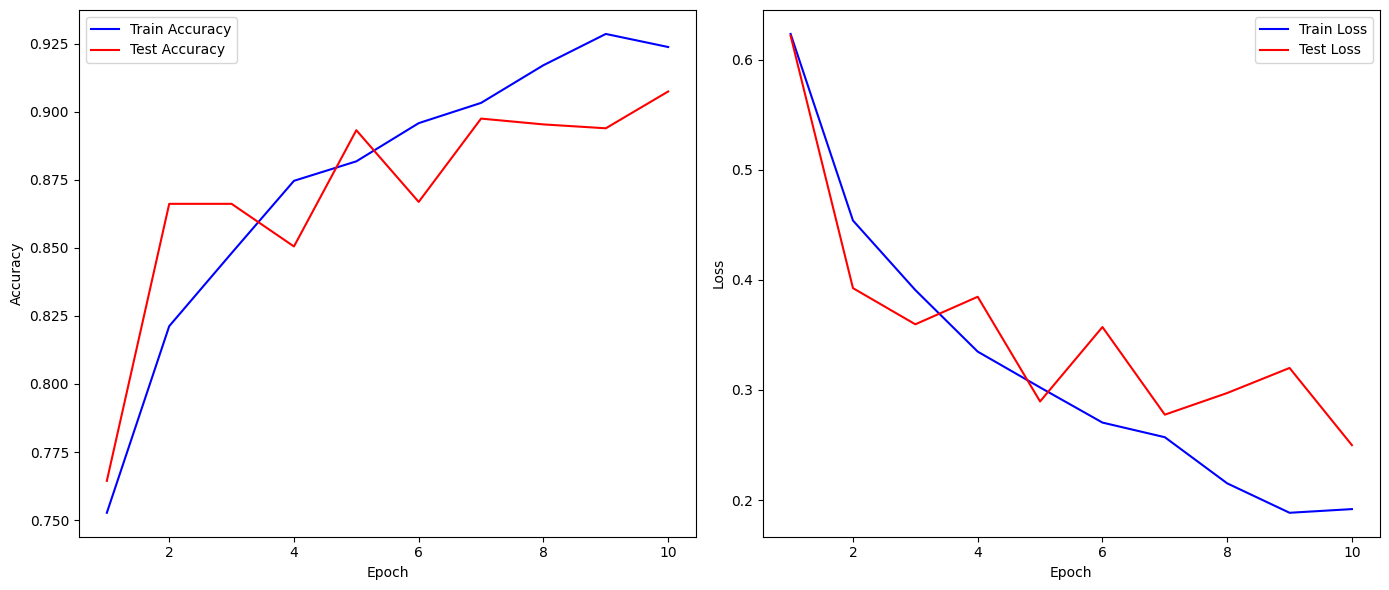

In [37]:
import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1,len(acc2)+1)
 
# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
 
axes[0].plot(epochs, acc2,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
 
axes[1].plot(epochs, loss2,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
 
# Adjusting layout for better spacing
plt.tight_layout()
 
# Display the figure
plt.show()

In [39]:
# # Convert test_dataset to numpy arrays for prediction
# X_test_list = []
# y_test_list = []
# for X_batch, y_batch in test_ds_rgb_final:
#     X_test_list.append(X_batch.numpy())
#     y_test_list.append(y_batch.numpy())

# X_test_np = np.concatenate(X_test_list, axis=0)
# y_test_np = np.concatenate(y_test_list, axis=0)

# Make predictions
with tf.device('/CPU:0'):
    predict_x = model.predict(X_test_np)
    predict1 = np.argmax(predict_x, axis=1)

# Print predictions
print(predict1)

44/44 [==============================] - 54s 1s/step
[3 2 1 ... 3 3 3]


In [40]:
from sklearn.metrics import classification_report 

# Print classification report
target_names = ["Class {}".format(i) for i in class_names]
print(classification_report(y_test_np, predict1, target_names=target_names))

                  precision    recall  f1-score   support

   Class gilioma       0.89      0.87      0.88       309
Class meningioma       0.87      0.83      0.85       335
   Class notumor       0.97      0.97      0.97       399
 Class pituitary       0.89      0.94      0.91       362

        accuracy                           0.91      1405
       macro avg       0.90      0.90      0.90      1405
    weighted avg       0.91      0.91      0.91      1405

